# Q2

Suppose you are the CEO of a restaurant franchise and are considering different
cities for opening a new outlet. The chain already has trucks in various cities and
you have data for profits and populations from the cities. You would like to use
this data to help you select which city to expand to next. Also, Predict profit for
a city with a population of 35,000. A negative value for profit indicates a loss.
(The dataset is attached as an Excel file). Apply Linear regression for the above
task and find the fittest line. Also, do data preprocessing, data cleaning, and
exploratory data analysis before applying the algorithm to the model.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_excel('Food Franchise dataset.xlsx')
df

,City,State,Population,Avg. Monthly Food Truck Profit,Median Income,Population Density (per sq mi)
0,City1,TX,2043891,25000.0,72542.0,3157
1,City2,CO,715522,22000.0,78621.0,4823
2,City3,WA,739952,28500.0,89728.0,1831
3,City4,OR,652503,NaN,NaN,4182
4,City5,IL,2740598,32000.0,70318.0,5242
...,...,...,...,...,...,...
65,City66,TX,1587624,24062.0,68168.0,2453
66,City67,PA,3027484,18572.0,71063.0,2994
67,City68,AL,4697485,24797.0,76300.0,1554
68,City69,WI,2689437,29630.0,76366.0,2801


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 6 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   City                            70 non-null     object 
 1   State                           70 non-null     object 
 2   Population                      70 non-null     int64  
 3   Avg. Monthly Food Truck Profit  67 non-null     float64
 4   Median Income                   67 non-null     float64
 5   Population Density (per sq mi)  70 non-null     int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 3.4+ KB


In [3]:
df.describe()

,Population,Avg. Monthly Food Truck Profit,Median Income,Population Density (per sq mi)
count,7.000000e+01,6.700000e+01,67.000000,70.000000
mean,2.205051e+06,4.483585e+10,70598.223881,2667.171429
std,1.355620e+06,2.715089e+11,7435.249846,1661.168211
min,4.980670e+05,1.534900e+04,55142.000000,1113.000000
25%,9.076455e+05,2.184450e+04,65437.000000,1819.750000
50%,1.713773e+06,2.479700e+04,69866.000000,2453.000000
75%,3.027484e+06,2.963000e+04,73235.000000,2972.000000
max,4.914006e+06,2.000000e+12,102414.000000,13688.000000


In [4]:
df.isnull().sum()

City                              0
State                             0
Population                        0
Avg. Monthly Food Truck Profit    3
Median Income                     3
Population Density (per sq mi)    0
dtype: int64

In [5]:
df['Avg. Monthly Food Truck Profit'].fillna(
    df['Avg. Monthly Food Truck Profit'].median(), inplace=True)
df['Median Income'].fillna(df['Median Income'].median(), inplace=True)

# Feature Selection (not clear what feature to select....)
X = df[['Population', 'Population Density (per sq mi)']]
y = df['Avg. Monthly Food Truck Profit']

         Population  Avg. Monthly Food Truck Profit  Median Income  \
count  7.000000e+01                    7.000000e+01      70.000000   
mean   2.205051e+06                    4.291431e+10   70566.842857   
std    1.355620e+06                    2.656985e+11    7273.351777   
min    4.980670e+05                    1.534900e+04   55142.000000   
25%    9.076455e+05                    2.200000e+04   65578.750000   
50%    1.713773e+06                    2.479700e+04   69866.000000   
75%    3.027484e+06                    2.963000e+04   72452.750000   
max    4.914006e+06                    2.000000e+12  102414.000000   

       Population Density (per sq mi)  
count                       70.000000  
mean                      2667.171429  
std                       1661.168211  
min                       1113.000000  
25%                       1819.750000  
50%                       2453.000000  
75%                       2972.000000  
max                      13688.000000  


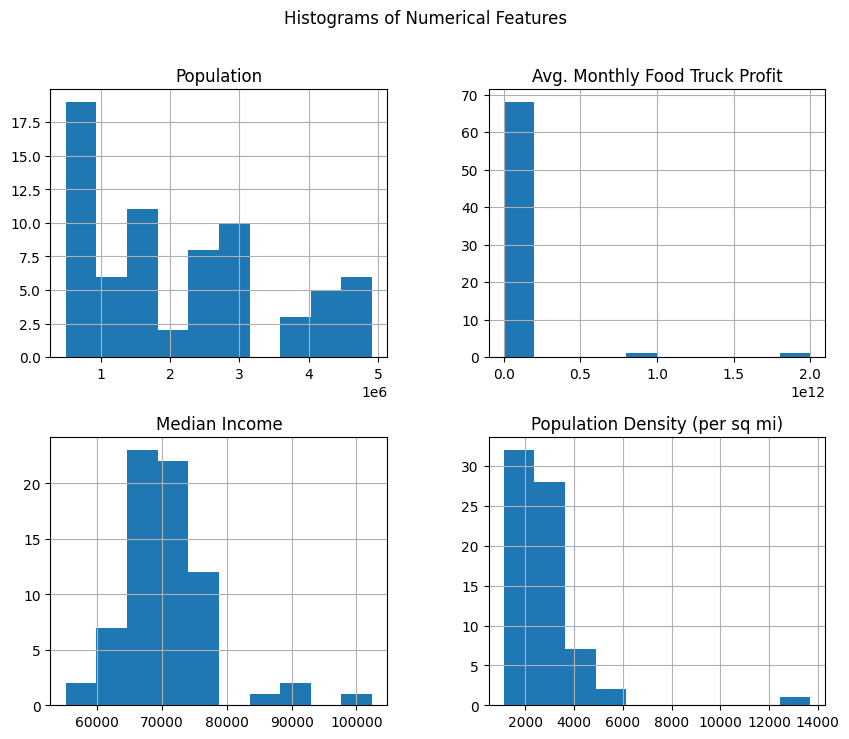

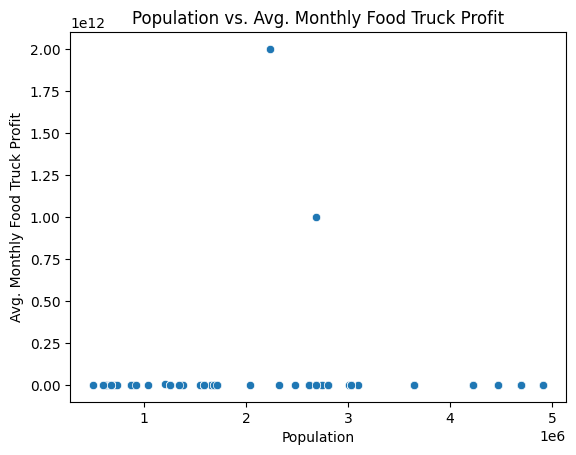

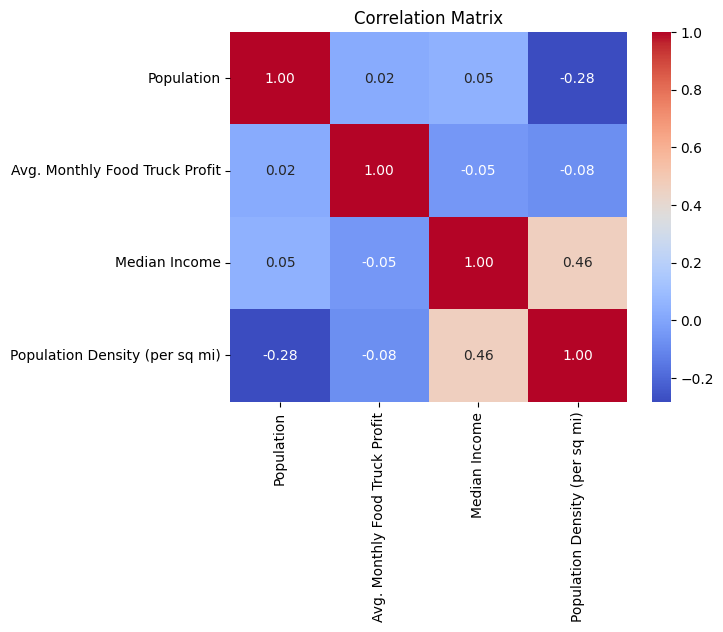

Missing Values:
City                              0
State                             0
Population                        0
Avg. Monthly Food Truck Profit    0
Median Income                     0
Population Density (per sq mi)    0
dtype: int64


In [7]:
# 1. Summary Statistics
print(df.describe())

# 2. Data Visualization
# Histograms
df.hist(figsize=(10, 8))
plt.suptitle('Histograms of Numerical Features')
plt.show()

# Scatter plot
sns.scatterplot(x='Population', y='Avg. Monthly Food Truck Profit', data=df)
plt.title('Population vs. Avg. Monthly Food Truck Profit')
plt.xlabel('Population')
plt.ylabel('Avg. Monthly Food Truck Profit')
plt.show()

# 3. Correlation Analysis
numeric_df = df.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# 4. Handling Missing Values
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)

In [8]:
def evaluate_model(regressor, X_train, X_test, y_train, y_test, tolerance=0.1):
    from sklearn.metrics import mean_squared_error, r2_score

    # Train the model
    regressor.fit(X_train, y_train)

    # Make predictions
    y_pred = regressor.predict(X_test)

    # Calculate and print metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # Calculate accuracy within tolerance
    accuracy = np.mean(np.abs(y_pred - y_test) / y_test <= tolerance)

    print("Mean Squared Error (MSE):", mse)
    print("Root Mean Squared Error (RMSE):", rmse)
    print("R-squared (R^2) Score:", r2)
    print("Accuracy within tolerance (%):", accuracy * 100)


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

evaluate_model(model, X_train, X_test, y_train, y_test)

Mean Squared Error (MSE): 3.336101039474672e+21
Root Mean Squared Error (RMSE): 57758990983.8691
R-squared (R^2) Score: -270863882932263.47
Accuracy within tolerance (%): 0.0


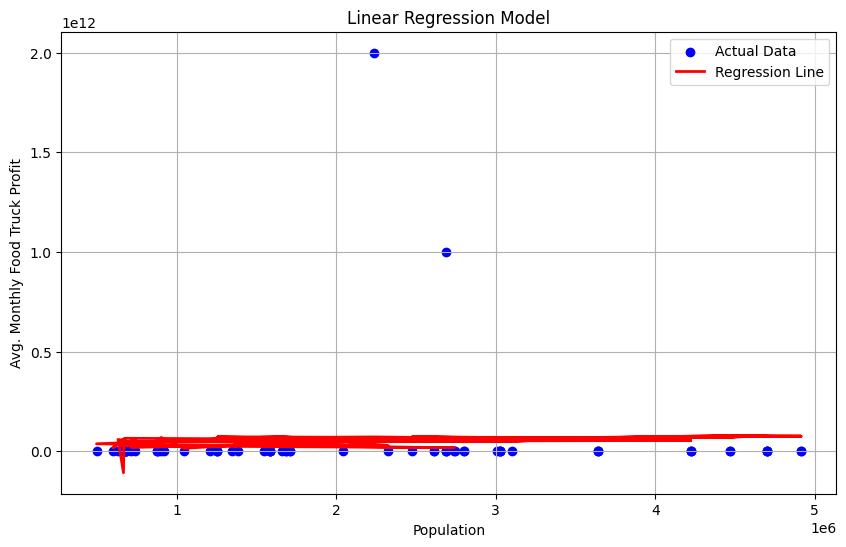

In [10]:
# Plot the actual data points
plt.figure(figsize=(10, 6))
plt.scatter(X['Population'], y, color='blue', label='Actual Data')

# Plot the regression line
plt.plot(X['Population'], model.predict(X[['Population', 'Population Density (per sq mi)']]),
         color='red', linewidth=2, label='Regression Line')

# Add labels and title
plt.xlabel('Population')
plt.ylabel('Avg. Monthly Food Truck Profit')
plt.title('Linear Regression Model')
plt.legend()
plt.grid(True)
plt.show()

In [13]:
z_scores = (df['Population'] - df['Population'].mean()) / \
    df['Population'].std()
df_cleaned = df[abs(z_scores) < 3] 

X = df_cleaned[['Population', 'Population Density (per sq mi)']]
y = df_cleaned['Avg. Monthly Food Truck Profit']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

evaluate_model(model, X_train, X_test, y_train, y_test)

Mean Squared Error (MSE): 3.336101039474672e+21
Root Mean Squared Error (RMSE): 57758990983.8691
R-squared (R^2) Score: -270863882932263.47
Accuracy within tolerance (%): 0.0


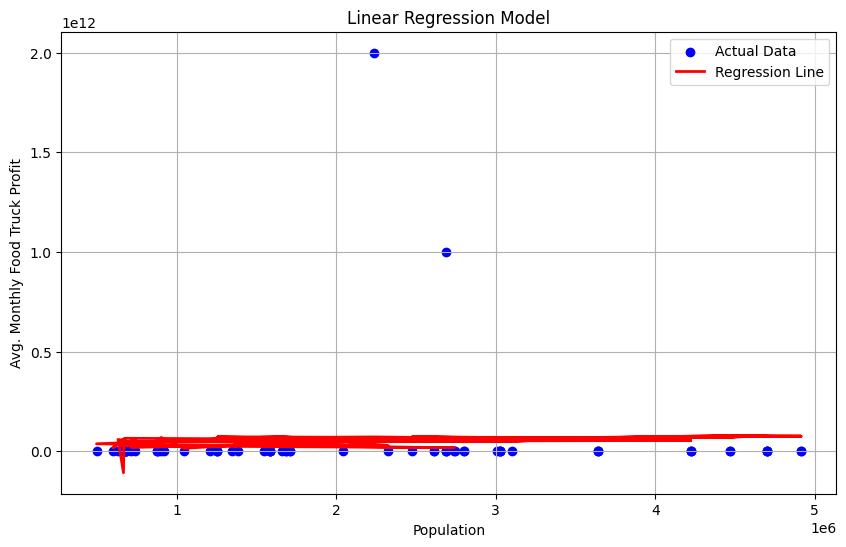

In [14]:
# Plot the actual data points
plt.figure(figsize=(10, 6))
plt.scatter(df_cleaned['Population'], df_cleaned['Avg. Monthly Food Truck Profit'],
            color='blue', label='Actual Data')

# Plot the regression line
plt.plot(df_cleaned['Population'], model.predict(X),
         color='red', linewidth=2, label='Regression Line')

# Add labels and title
plt.xlabel('Population')
plt.ylabel('Avg. Monthly Food Truck Profit')
plt.title('Linear Regression Model')
plt.legend()
plt.grid(True)
plt.show()

In [15]:
df

,City,State,Population,Avg. Monthly Food Truck Profit,Median Income,Population Density (per sq mi)
0,City1,TX,2043891,25000.0,72542.0,3157
1,City2,CO,715522,22000.0,78621.0,4823
2,City3,WA,739952,28500.0,89728.0,1831
3,City4,OR,652503,24797.0,69866.0,4182
4,City5,IL,2740598,32000.0,70318.0,5242
...,...,...,...,...,...,...
65,City66,TX,1587624,24062.0,68168.0,2453
66,City67,PA,3027484,18572.0,71063.0,2994
67,City68,AL,4697485,24797.0,76300.0,1554
68,City69,WI,2689437,29630.0,76366.0,2801


In [26]:
# Calculate z-scores for the 'Population' and 'Avg. Monthly Food Truck Profit' columns
z_scores_population = (
    df['Population'] - df['Population'].mean()) / df['Population'].std()
z_scores_profit = (df['Avg. Monthly Food Truck Profit'] -
                   df['Avg. Monthly Food Truck Profit'].mean()) / df['Avg. Monthly Food Truck Profit'].std()

# Define a threshold for identifying outliers (e.g., z-score greater than 3)
threshold = 1

# Drop rows with outliers in both 'Population' and 'Avg. Monthly Food Truck Profit' columns
df_cleaned = df[(abs(z_scores_population) < threshold)
                & (abs(z_scores_profit) < threshold)]

# Print the shape of the cleaned DataFrame to see how many outliers were removed
print("Shape of cleaned DataFrame:", df_cleaned.shape)

Shape of cleaned DataFrame: (40, 6)


In [28]:
# Define lower and upper percentiles to consider as extreme values
lower_percentile = 5
upper_percentile = 95

# Calculate lower and upper thresholds based on percentiles
lower_threshold = np.percentile(
    df['Avg. Monthly Food Truck Profit'], lower_percentile)
upper_threshold = np.percentile(
    df['Avg. Monthly Food Truck Profit'], upper_percentile)

# Remove rows with extreme values
df_cleaned = df[(df['Avg. Monthly Food Truck Profit'] >= lower_threshold) & (
    df['Avg. Monthly Food Truck Profit'] <= upper_threshold)]

# Print the shape of the cleaned DataFrame to see how many extreme values were removed
print("Shape of cleaned DataFrame:", df_cleaned.shape)

Shape of cleaned DataFrame: (64, 6)


C:\Users\alikh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


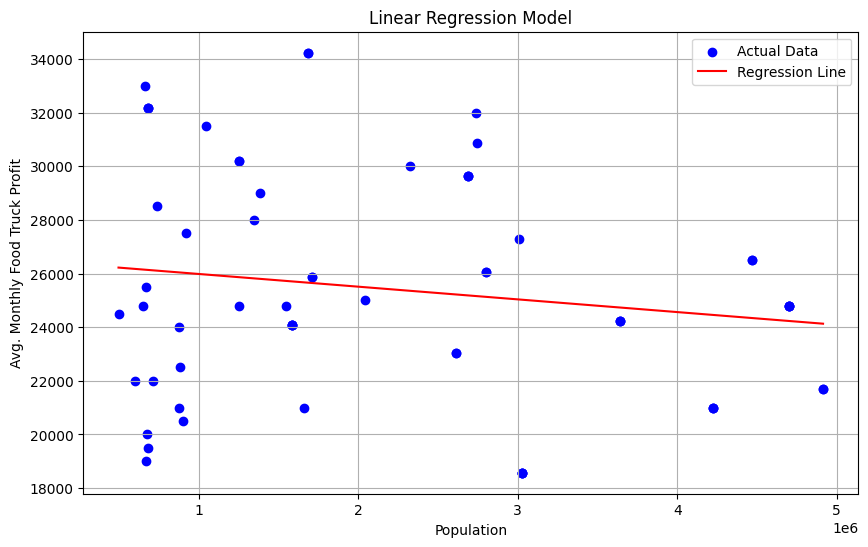

In [29]:
X = df_cleaned[['Population', 'Population Density (per sq mi)']]
y = df_cleaned['Avg. Monthly Food Truck Profit']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

plt.figure(figsize=(10, 6))
plt.scatter(X['Population'], y, color='blue',
            label='Actual Data')  # Plot actual data points

# Predicting the target variable for the entire range of population values
population_range = np.linspace(
    X['Population'].min(), X['Population'].max(), 100).reshape(-1, 1)
predicted_values = model.predict(np.hstack(
    [population_range, X['Population Density (per sq mi)'].mean() * np.ones_like(population_range)]))

plt.plot(population_range, predicted_values, color='red',
         label='Regression Line')

plt.xlabel('Population')
plt.ylabel('Avg. Monthly Food Truck Profit')
plt.title('Linear Regression Model')
plt.legend()
plt.grid(True)
plt.show()

In [30]:
evaluate_model(model, X_train, X_test, y_train, y_test)

Mean Squared Error (MSE): 10426470.06599497
Root Mean Squared Error (RMSE): 3229.004500770318
R-squared (R^2) Score: 0.06454766439579818
Accuracy within tolerance (%): 61.53846153846154
